In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

interval = "6h"
BTC_df = pd.read_csv(f"./data/BTC_{interval}.csv")
ETH_df = pd.read_csv(f"./data/ETH_{interval}.csv")
BNB_df = pd.read_csv(f"./data/BNB_{interval}.csv")
XRP_df = pd.read_csv(f"./data/XRP_{interval}.csv")

shared_times = set.intersection(set(BTC_df["open_time"]), (ETH_df["open_time"]), (BNB_df["open_time"]), (XRP_df["open_time"]))

def process_dataframe(df, prefix):
    """Adds a prefix to the column names of a DataFrame."""
    df = df.copy()
    df = df[["open_time", "open", "close", "low", "high"]]
    columns = {col: f"{prefix}_{col}" for col in df.columns if col != "open_time"}
    df.rename(columns=columns, inplace=True)
    df.set_index("open_time", inplace=True)
    return df

BTC_df_processed = process_dataframe(BTC_df, "BTC")
ETH_df_processed = process_dataframe(ETH_df, "ETH")
BNB_df_processed = process_dataframe(BNB_df, "BNB")
XRP_df_processed = process_dataframe(XRP_df, "XRP")

# Concatenate the dataframes side by side, aligning on 'open_time'
merged_df = pd.concat(
    [BTC_df_processed, ETH_df_processed, BNB_df_processed, XRP_df_processed],
    axis=1,
    join="outer",  # Use outer join to keep all 'open_time' values
)

merged_df.head()

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
open_time,,,,,,,,,,,,,,,,
2017-08-17 00:00:00,4261.48,4315.32,4261.32,4328.69,301.13,303.10,298.00,303.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,4330.29,4427.30,4287.41,4485.39,302.40,308.95,301.90,312.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 12:00:00,4436.06,4289.24,4235.45,4485.39,308.95,308.33,298.21,312.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 18:00:00,4289.24,4285.08,4200.74,4369.69,308.33,302.00,298.96,311.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-18 00:00:00,4285.08,4313.56,4134.61,4340.62,302.00,304.70,295.19,306.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
shared_df = merged_df.loc[list(shared_times)]

In [4]:
# filling the 2 missing time fata
shared_df.loc['2018-06-26 06:00:00'] = (shared_df.loc['2018-06-26 00:00:00'] + shared_df.loc['2018-06-26 12:00:00'])/2
shared_df.loc['2019-05-15 06:00:00'] = (shared_df.loc['2019-05-15 00:00:00'] + shared_df.loc['2019-05-15 12:00:00'])/2
shared_df = shared_df.sort_index()

In [5]:
merged_df_sorted = merged_df.sort_index()
shared_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10231 entries, 2018-05-04 06:00:00 to 2025-05-04 18:00:00
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_open   10231 non-null  float64
 1   BTC_close  10231 non-null  float64
 2   BTC_low    10231 non-null  float64
 3   BTC_high   10231 non-null  float64
 4   ETH_open   10231 non-null  float64
 5   ETH_close  10231 non-null  float64
 6   ETH_low    10231 non-null  float64
 7   ETH_high   10231 non-null  float64
 8   BNB_open   10231 non-null  float64
 9   BNB_close  10231 non-null  float64
 10  BNB_low    10231 non-null  float64
 11  BNB_high   10231 non-null  float64
 12  XRP_open   10231 non-null  float64
 13  XRP_close  10231 non-null  float64
 14  XRP_low    10231 non-null  float64
 15  XRP_high   10231 non-null  float64
dtypes: float64(16)
memory usage: 1.3+ MB


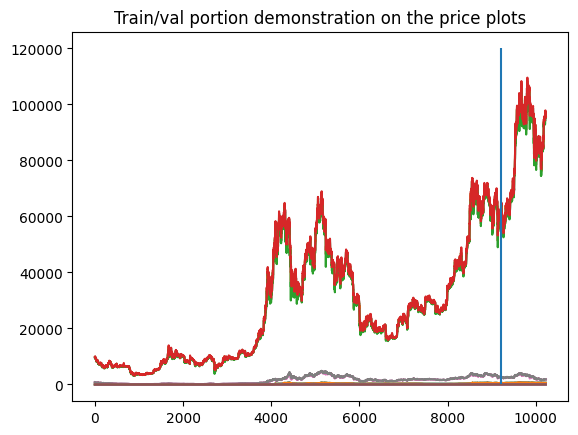

In [6]:
for col in shared_df:
    plt.plot(range(len(shared_df[col])), shared_df[col])
plt.title("Train/val portion demonstration on the price plots")
plt.vlines(len(shared_df) * 0.90, ymin=0, ymax=120000)

# log_z_norm Dataset

In [6]:
shared_df_train = shared_df.iloc[:int(len(shared_df)*0.9)]
shared_df_val = shared_df.iloc[len(shared_df_train):]

In [7]:
shared_df_train_log_norm = np.log10(shared_df_train + 0.00000001)
train_col_means, train_col_stds = shared_df_train_log_norm.mean(), shared_df_train_log_norm.std()
shared_df_train_log_z_norm = (shared_df_train_log_norm - train_col_means) / (train_col_stds + 0.00000001)

shared_df_val_log_norm = np.log10(shared_df_val + 0.00000001)
shared_df_val_log_z_norm = (shared_df_val_log_norm - train_col_means) / (train_col_stds + 0.00000001)

In [8]:
train_col_means_df = pd.DataFrame(train_col_means).T
train_col_means_df

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
0,4.277413,4.277501,4.272051,4.282368,2.929447,2.929504,2.922415,2.935828,1.962543,1.962712,1.955388,1.968923,-0.357867,-0.357857,-0.365927,-0.35055


In [9]:
train_col_stds_df = pd.DataFrame(train_col_stds).T
train_col_stds_df

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
0,0.373547,0.373572,0.373401,0.373643,0.515405,0.515429,0.515699,0.515001,0.673487,0.673472,0.674087,0.672936,0.207892,0.207897,0.206664,0.208972


In [10]:
shared_df_train_log_z_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 2018-05-04 06:00:00 to 2024-08-21 18:00:00
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_open   9207 non-null   float64
 1   BTC_close  9207 non-null   float64
 2   BTC_low    9207 non-null   float64
 3   BTC_high   9207 non-null   float64
 4   ETH_open   9207 non-null   float64
 5   ETH_close  9207 non-null   float64
 6   ETH_low    9207 non-null   float64
 7   ETH_high   9207 non-null   float64
 8   BNB_open   9207 non-null   float64
 9   BNB_close  9207 non-null   float64
 10  BNB_low    9207 non-null   float64
 11  BNB_high   9207 non-null   float64
 12  XRP_open   9207 non-null   float64
 13  XRP_close  9207 non-null   float64
 14  XRP_low    9207 non-null   float64
 15  XRP_high   9207 non-null   float64
dtypes: float64(16)
memory usage: 1.2+ MB


In [11]:
shared_df_val_log_z_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 2024-08-22 00:00:00 to 2025-05-04 18:00:00
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_open   1024 non-null   float64
 1   BTC_close  1024 non-null   float64
 2   BTC_low    1024 non-null   float64
 3   BTC_high   1024 non-null   float64
 4   ETH_open   1024 non-null   float64
 5   ETH_close  1024 non-null   float64
 6   ETH_low    1024 non-null   float64
 7   ETH_high   1024 non-null   float64
 8   BNB_open   1024 non-null   float64
 9   BNB_close  1024 non-null   float64
 10  BNB_low    1024 non-null   float64
 11  BNB_high   1024 non-null   float64
 12  XRP_open   1024 non-null   float64
 13  XRP_close  1024 non-null   float64
 14  XRP_low    1024 non-null   float64
 15  XRP_high   1024 non-null   float64
dtypes: float64(16)
memory usage: 136.0+ KB


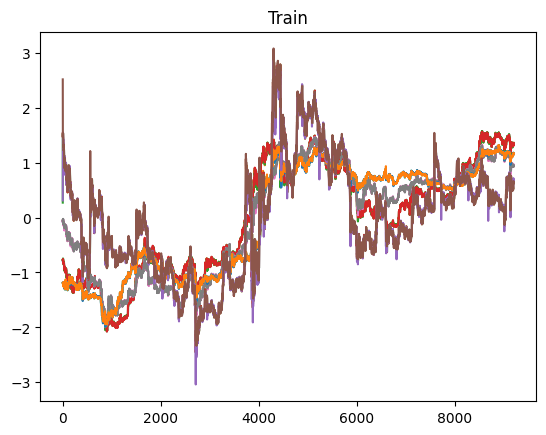

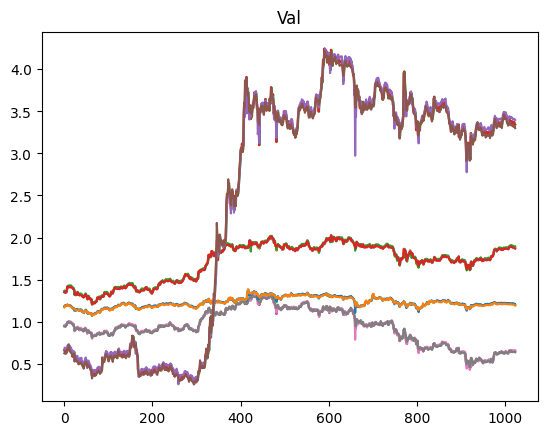

In [12]:
for col in shared_df_train_log_z_norm:
    plt.plot(range(len(shared_df_train_log_z_norm[col])), shared_df_train_log_z_norm[col])
plt.title("Train")
plt.show()

for col in shared_df_val_log_z_norm:
    plt.plot(range(len(shared_df_val_log_z_norm[col])), shared_df_val_log_z_norm[col])
plt.title("Val")
plt.show()

In [13]:
shared_df_train_log_z_norm.to_csv("./data/BTC_ETH_BNB_XRP_6h_log_and_z_norm_train.csv", index=True)
shared_df_val_log_z_norm.to_csv("./data/BTC_ETH_BNB_XRP_6h_log_and_z_norm_val.csv", index=True)
train_col_means_df.to_csv("./data/BTC_ETH_BNB_XRP_6h_z_norm_means.csv", index=False)
train_col_stds_df.to_csv("./data/BTC_ETH_BNB_XRP_6h_z_norm_stds.csv", index=False)

# Log Return Dataset

In [7]:
log_returns = np.log(shared_df.shift(-1) / shared_df)
log_returns.dropna(inplace=True)

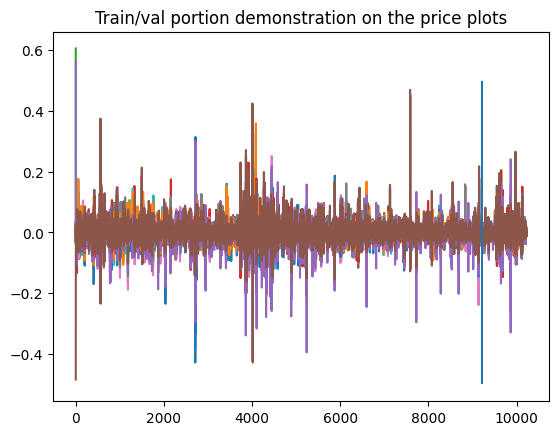

In [8]:
for col in log_returns:
    plt.plot(range(len(log_returns[col])), log_returns[col])
plt.title("Train/val portion demonstration on the price plots")
plt.vlines(len(log_returns) * 0.90, ymin=-0.5, ymax=0.5)

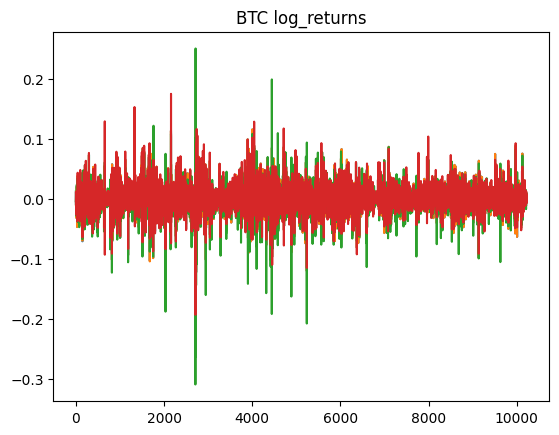

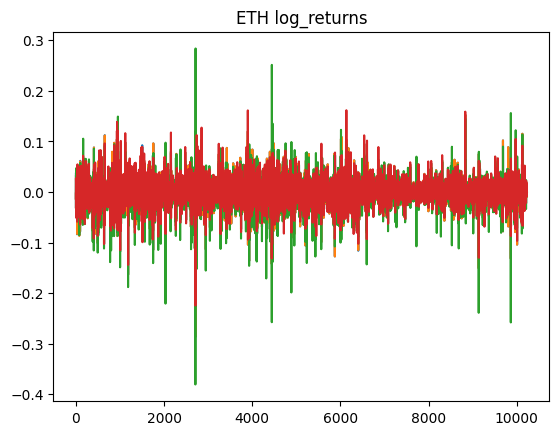

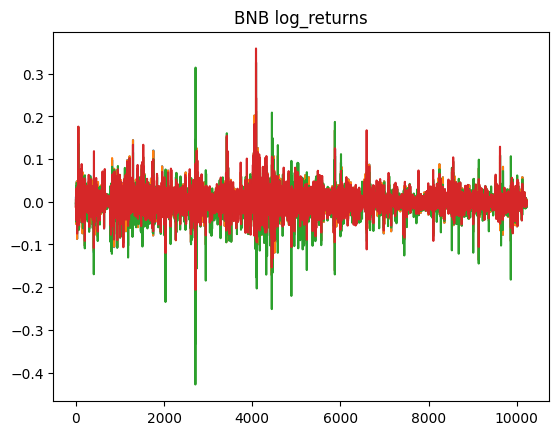

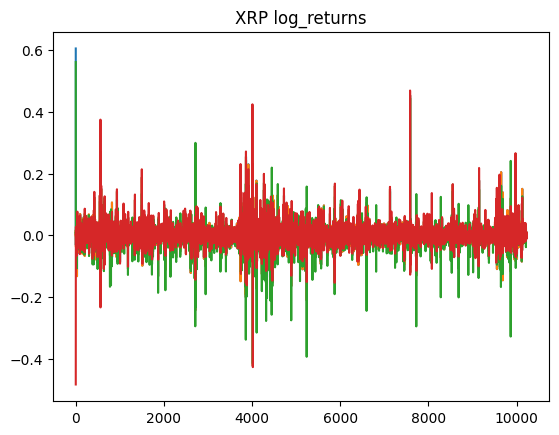

In [9]:
for col in log_returns:
    if "BTC" in col:
        plt.plot(range(len(log_returns[col])), log_returns[col])
plt.title("BTC log_returns")
plt.show()
for col in log_returns:
    if "ETH" in col:
        plt.plot(range(len(log_returns[col])), log_returns[col])
plt.title("ETH log_returns")
plt.show()
for col in log_returns:
    if "BNB" in col:
        plt.plot(range(len(log_returns[col])), log_returns[col])
plt.title("BNB log_returns")
plt.show()
for col in log_returns:
    if "XRP" in col:
        plt.plot(range(len(log_returns[col])), log_returns[col])
plt.title("XRP log_returns")
plt.show()

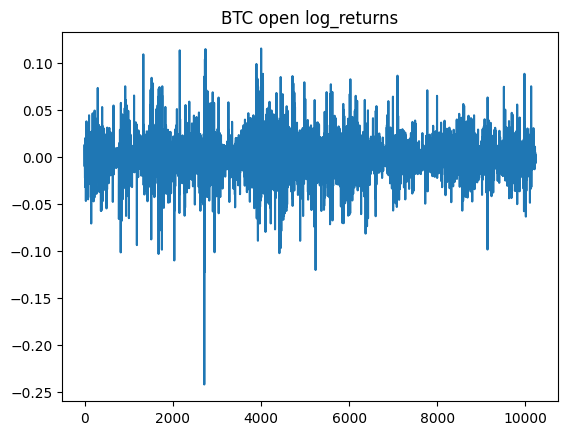

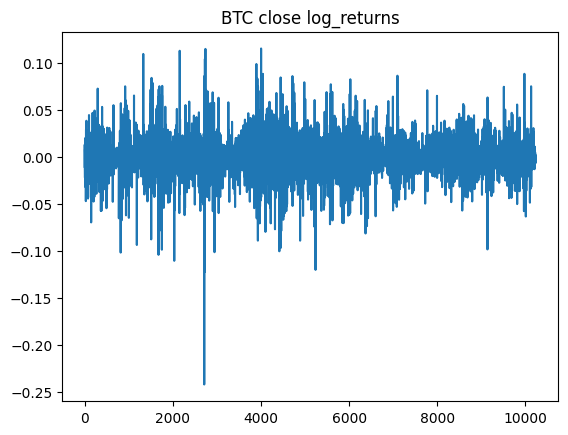

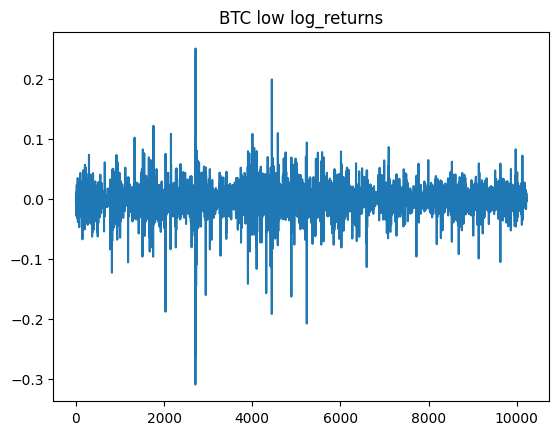

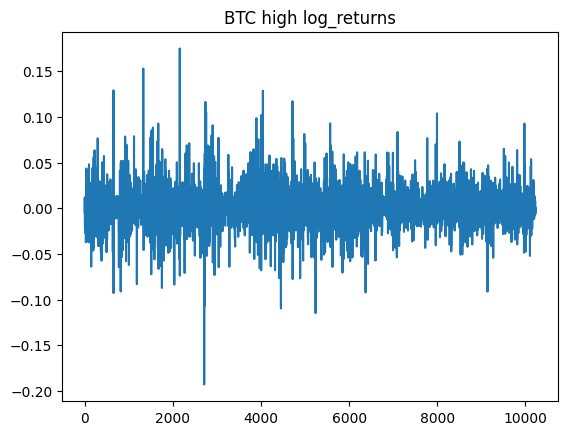

In [10]:
plt.plot(range(len(log_returns["BTC_open"])), log_returns["BTC_open"])
plt.title("BTC open log_returns")
plt.show()
plt.plot(range(len(log_returns["BTC_close"])), log_returns["BTC_close"])
plt.title("BTC close log_returns")
plt.show()
plt.plot(range(len(log_returns["BTC_low"])), log_returns["BTC_low"])
plt.title("BTC low log_returns")
plt.show()
plt.plot(range(len(log_returns["BTC_high"])), log_returns["BTC_high"])
plt.title("BTC high log_returns")
plt.show()

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
count,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000
mean,0.000224,0.000223,0.000224,0.000222,0.000084,0.000081,0.000084,0.000080,0.000362,0.000362,0.000363,0.000360,0.000144,0.000084,0.000143,0.000037
std,0.016671,0.016670,0.017873,0.015547,0.021558,0.021537,0.023416,0.019155,0.022142,0.022137,0.023471,0.019919,0.027133,0.026469,0.029220,0.026254
min,-0.241832,-0.242065,-0.308809,-0.192944,-0.286894,-0.285648,-0.380772,-0.224767,-0.298550,-0.299660,-0.427785,-0.206330,-0.423492,-0.423492,-0.416333,-0.483967
25%,-0.005656,-0.005650,-0.005754,-0.005607,-0.008280,-0.008249,-0.007701,-0.007615,-0.008131,-0.008113,-0.007168,-0.007407,-0.009259,-0.009274,-0.008075,-0.009181
50%,0.000255,0.000247,0.001280,-0.000663,0.000218,0.000215,0.001617,-0.000965,0.000410,0.000414,0.001415,-0.000561,-0.000071,-0.000042,0.001619,-0.001437
75%,0.006521,0.006504,0.006867,0.005756,0.009118,0.009109,0.009440,0.007634,0.008949,0.008963,0.009268,0.006989,0.009300,0.009322,0.009895,0.007067
max,0.115651,0.115691,0.250339,0.174897,0.152571,0.152571,0.283779,0.161646,0.326178,0.326189,0.314193,0.358971,0.605365,0.453444,0.561260,0.469054


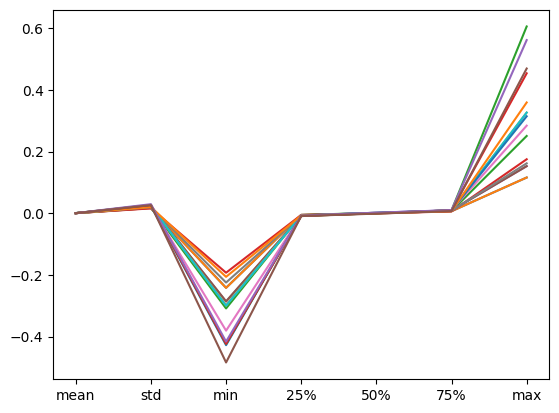

In [11]:
plt.plot(log_returns.describe().iloc[1:])
log_returns.describe()

In [12]:
log_returns_train = log_returns.iloc[:int(len(log_returns)*0.9)]
log_returns_val = log_returns.iloc[len(log_returns_train):]

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
count,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000,9207.000000
mean,0.000201,0.000198,0.000198,0.000199,0.000133,0.000129,0.000131,0.000128,0.000400,0.000399,0.000398,0.000397,0.000020,-0.000046,0.000018,-0.000099
std,0.017012,0.017011,0.018314,0.015854,0.021822,0.021798,0.023632,0.019378,0.022832,0.022826,0.024137,0.020504,0.026970,0.026227,0.029048,0.026254
min,-0.241832,-0.242065,-0.308809,-0.192944,-0.286894,-0.285648,-0.380772,-0.224767,-0.298550,-0.299660,-0.427785,-0.206330,-0.423492,-0.423492,-0.416333,-0.483967
25%,-0.005779,-0.005784,-0.005792,-0.005654,-0.008311,-0.008258,-0.007677,-0.007582,-0.008437,-0.008419,-0.007320,-0.007659,-0.009247,-0.009248,-0.008051,-0.009158
50%,0.000219,0.000214,0.001307,-0.000700,0.000216,0.000209,0.001696,-0.000979,0.000417,0.000425,0.001542,-0.000621,-0.000206,-0.000192,0.001631,-0.001449
75%,0.006533,0.006524,0.006926,0.005765,0.009132,0.009125,0.009471,0.007588,0.009251,0.009235,0.009517,0.007193,0.009222,0.009147,0.009845,0.006926
max,0.115651,0.115691,0.250339,0.174897,0.152571,0.152571,0.283779,0.161646,0.326178,0.326189,0.314193,0.358971,0.605365,0.453444,0.561260,0.469054


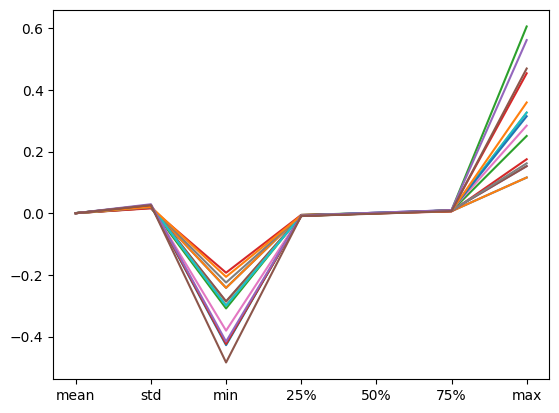

In [13]:
plt.plot(log_returns_train.describe().iloc[1:])
log_returns_train.describe()

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.000435,0.000442,0.000457,0.000434,-0.000356,-0.000352,-0.000339,-0.000358,0.000028,0.000030,0.000046,0.000030,0.001259,0.001253,0.001269,0.001259
std,0.013218,0.013216,0.013262,0.012453,0.019024,0.019024,0.021380,0.017017,0.014539,0.014540,0.016302,0.013567,0.028547,0.028546,0.030722,0.026238
min,-0.063241,-0.063240,-0.105140,-0.054263,-0.131928,-0.131924,-0.258083,-0.096691,-0.092122,-0.092104,-0.182322,-0.073982,-0.146155,-0.146250,-0.328682,-0.089334
25%,-0.004876,-0.004844,-0.005109,-0.005130,-0.008225,-0.008229,-0.007920,-0.008122,-0.006340,-0.006313,-0.005959,-0.005719,-0.009471,-0.009495,-0.008372,-0.009510
50%,0.000476,0.000476,0.001064,-0.000267,0.000360,0.000360,0.001225,-0.000770,0.000149,0.000173,0.000590,-0.000334,0.001003,0.000958,0.001580,-0.001325
75%,0.006449,0.006449,0.006355,0.005609,0.008788,0.008789,0.008816,0.008054,0.007379,0.007392,0.006938,0.005614,0.010539,0.010420,0.010529,0.008444
max,0.088714,0.088714,0.082495,0.092693,0.115082,0.115149,0.156057,0.104873,0.108429,0.108429,0.109188,0.128908,0.233639,0.233673,0.240928,0.265979


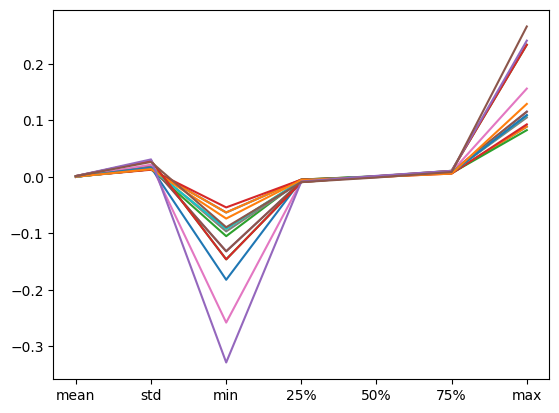

In [14]:
plt.plot(log_returns_val.describe().iloc[1:])
log_returns_val.describe()

In [17]:
log_returns_train.to_csv("./data/BTC_ETH_BNB_XRP_6h_log_returns_train.csv", index=True)
log_returns_val.to_csv("./data/BTC_ETH_BNB_XRP_6h_log_returns_val.csv", index=True)

In [21]:
log_returns_train_toy = log_returns.iloc[:int(len(log_returns)*0.03)]
log_returns_val_toy = log_returns.iloc[int(len(log_returns)*0.03):int(len(log_returns)*0.04)]

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,-0.000853,-0.000877,-0.000851,-0.000851,-0.001645,-0.001756,-0.001652,-0.001722,-0.000346,-0.000374,-0.000377,-0.000406,-0.000145,-0.002133,-0.000181,-0.003703
std,0.015741,0.015681,0.016014,0.015175,0.022024,0.021934,0.023126,0.019179,0.026312,0.026284,0.023637,0.024135,0.041392,0.022658,0.039189,0.034320
min,-0.070586,-0.069501,-0.067201,-0.063959,-0.085992,-0.086943,-0.085522,-0.064497,-0.103266,-0.103098,-0.109114,-0.091634,-0.132866,-0.132848,-0.107508,-0.483967
25%,-0.007071,-0.007040,-0.008057,-0.007607,-0.011947,-0.011783,-0.012789,-0.011516,-0.013559,-0.013380,-0.012963,-0.011050,-0.013560,-0.013296,-0.011123,-0.012207
50%,-0.000233,-0.000268,0.000057,-0.001471,-0.000615,-0.000523,0.000599,-0.002332,-0.000046,-0.000362,0.001391,-0.002149,-0.001025,-0.001522,-0.000672,-0.002146
75%,0.005399,0.005431,0.005585,0.005842,0.009379,0.009260,0.009907,0.006114,0.013035,0.012974,0.010417,0.008942,0.009075,0.009243,0.009169,0.006642
max,0.073650,0.072949,0.073404,0.076513,0.061565,0.062022,0.105339,0.071548,0.175095,0.174980,0.135692,0.175990,0.605365,0.068770,0.561260,0.085942


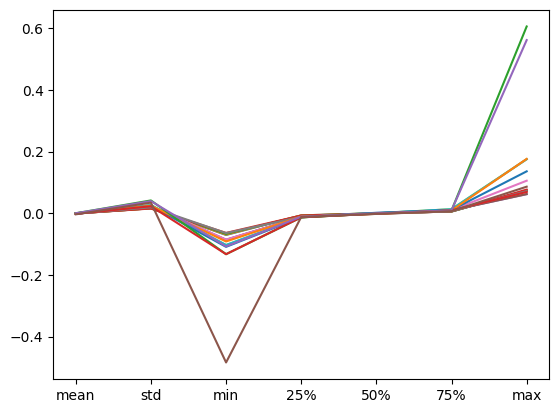

In [22]:
plt.plot(log_returns_train_toy.describe().iloc[1:])
log_returns_train_toy.describe()

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,-0.002064,-0.002086,-0.002078,-0.002002,-0.005673,-0.005907,-0.005962,-0.005628,-0.003660,-0.003658,-0.003766,-0.003304,-0.005940,-0.005987,-0.006070,-0.005800
std,0.018783,0.018769,0.018691,0.016513,0.020981,0.020965,0.024733,0.017863,0.023195,0.023124,0.025646,0.021848,0.024815,0.024704,0.024190,0.019047
min,-0.057196,-0.057306,-0.062849,-0.057451,-0.097846,-0.097664,-0.115754,-0.092026,-0.118913,-0.115205,-0.169725,-0.108005,-0.080599,-0.083219,-0.094861,-0.076544
25%,-0.007236,-0.006870,-0.010428,-0.008109,-0.011336,-0.011244,-0.012514,-0.010914,-0.014094,-0.013866,-0.009850,-0.010819,-0.014044,-0.013779,-0.012379,-0.012101
50%,0.000988,0.001210,0.001615,-0.001358,-0.002368,-0.003082,0.000370,-0.003217,-0.000617,-0.000132,0.000568,-0.000941,-0.003431,-0.003528,-0.001190,-0.003777
75%,0.005725,0.005737,0.007204,0.005621,0.004270,0.003809,0.006876,0.003208,0.007816,0.008204,0.007663,0.005136,0.006043,0.005747,0.006351,0.001911
max,0.053373,0.053485,0.042988,0.050255,0.036679,0.035239,0.039764,0.028451,0.060889,0.058609,0.058832,0.053004,0.064252,0.065036,0.038312,0.060113


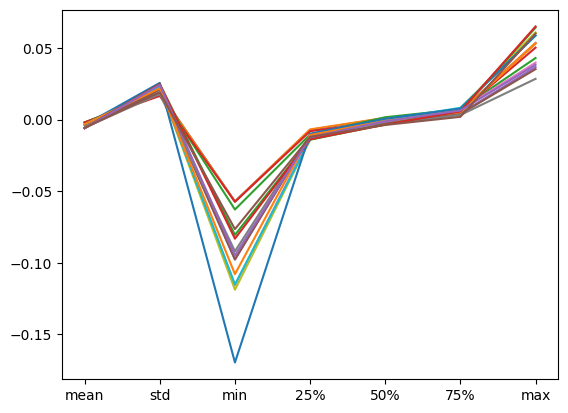

In [23]:
plt.plot(log_returns_val_toy.describe().iloc[1:])
log_returns_val_toy.describe()

In [26]:
log_returns_train_toy.to_csv("./data/BTC_ETH_BNB_XRP_6h_log_returns_train_toy.csv", index=True)
log_returns_val_toy.to_csv("./data/BTC_ETH_BNB_XRP_6h_log_returns_val_toy.csv", index=True)